In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar Datos

In [2]:
data = pd.read_csv('../data/INvideos_cc50.csv')

c:\Users\GART-03\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
categories = pd.read_json('../data/IN_category_id.json')

## Inspeccionar los Datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38528 non-null  object 
 1   trending_date           37617 non-null  object 
 2   title                   37535 non-null  object 
 3   channel_title           37422 non-null  object 
 4   category_id             37389 non-null  object 
 5   publish_time            37376 non-null  object 
 6   tags                    37364 non-null  object 
 7   views                   37357 non-null  object 
 8   likes                   37352 non-null  float64
 9   dislikes                37352 non-null  float64
 10  comment_count           37352 non-null  float64
 11  thumbnail_link          37352 non-null  object 
 12  comments_disabled       37352 non-null  object 
 13  ratings_disabled        37352 non-null  object 
 14  video_error_or_removed  37352 non-null

In [5]:
data.describe()

,likes,dislikes,comment_count,lat,lon
count,3.735200e+04,3.735200e+04,37352.00000,38533.000000,38533.000000
mean,2.708272e+04,1.665082e+03,2676.99743,22.659994,82.153458
std,9.714510e+04,1.607617e+04,14868.31713,6.806052,7.461992
min,0.000000e+00,0.000000e+00,0.00000,8.900373,72.636867
25%,8.640000e+02,1.080000e+02,81.00000,19.250232,76.569993
50%,3.069000e+03,3.260000e+02,329.00000,23.835404,78.570026
75%,1.377425e+04,1.019250e+03,1285.00000,27.333330,88.616647
max,2.912710e+06,1.545017e+06,827755.00000,34.299959,94.216667


In [6]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966.0,798.0,882.0,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,FALSO,FALSO,FALSO,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735.0,904.0,0.0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,VERDADERO,FALSO,FALSO,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011.0,243.0,149.0,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,FALSO,FALSO,FALSO,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353.0,1624.0,2684.0,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,FALSO,FALSO,FALSO,This video showcases the difference between pe...,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492.0,293.0,66.0,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,FALSO,FALSO,FALSO,why Samantha became EMOTIONAL @ Samantha naga ...,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)


Observaciones:

* trending_date está en formato año, dia, mes
* Es necesario convertir a dato booleano o numérico los campos con categorías verdadero o falso

In [7]:
categories = pd.read_json('../data/IN_category_id.json')

In [8]:
categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [9]:
categories = pd.json_normalize(categories['items'])

In [10]:
categories.head()

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [11]:
# Creamos variables ficticias para las caracteristicas "Sex" y "Embarked"
#sex = pd.get_dummies(data['Sex'],drop_first=True)
#embark = pd.get_dummies(data['Embarked'],drop_first=True)

##  Pre-Procesar los Datos

In [12]:
# a fecha: trending_date , publish_time | yyyy-mm-dd 
# con hora: publish_time
# separar en 2 columnas float: geometry
# VERDADERO |	FALSO	boolean : ratings_disabled , comments_disabled , video_error_or_removed
# int : views
# eliminar ? : thumbnail_link , title , description
# describir categoria : category_id
# a categoría ?? : channel_title , state
# ??? tags

### Estandarización de tipo de datos

In [13]:
import datetime

In [14]:
data['publish_time'] = pd.to_datetime(data['publish_time'],errors="coerce")

In [15]:
data['trending_date'] = pd.to_datetime(data['trending_date'],format="%y.%d.%m",errors="coerce")

In [16]:
#data['comments_disabled'].apply( vf_to_boolean )
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']
] = data[['ratings_disabled','comments_disabled',
  'video_error_or_removed']].applymap(
  lambda x : True if x == 'VERDADERO' else False if x == 'FALSO'
  else np.NaN )

In [17]:
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']] = data[['ratings_disabled','comments_disabled', 'video_error_or_removed']].astype("bool")

In [18]:
data['views'] = pd.to_numeric(data['views'],errors="coerce",downcast='integer')
data[['views','likes','dislikes','comment_count']] = data[['views','likes','dislikes','comment_count']].astype('Int64')

In [19]:
# separar en 2 columnas float: geometry?

In [28]:
categories['snippet.title'] = categories['snippet.title'].astype("category")
categories['snippet.title']

0         Film & Animation
1         Autos & Vehicles
2                    Music
3           Pets & Animals
4                   Sports
5             Short Movies
6          Travel & Events
7                   Gaming
8            Videoblogging
9           People & Blogs
10                  Comedy
11           Entertainment
12         News & Politics
13           Howto & Style
14               Education
15    Science & Technology
16                  Movies
17         Anime/Animation
18        Action/Adventure
19                Classics
20                  Comedy
21             Documentary
22                   Drama
23                  Family
24                 Foreign
25                  Horror
26          Sci-Fi/Fantasy
27                Thriller
28                  Shorts
29                   Shows
30                Trailers
Name: snippet.title, dtype: category
Categories (30, object): ['Action/Adventure', 'Anime/Animation', 'Autos & Vehicles', 'Classics', ..., 'Thriller', 'Trailers', 

### Datos procesados

In [20]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                38528 non-null  object             
 1   trending_date           37352 non-null  datetime64[ns]     
 2   title                   37535 non-null  object             
 3   channel_title           37422 non-null  object             
 4   category_id             37389 non-null  object             
 5   publish_time            37352 non-null  datetime64[ns, UTC]
 6   tags                    37364 non-null  object             
 7   views                   37352 non-null  Int64              
 8   likes                   37352 non-null  Int64              
 9   dislikes                37352 non-null  Int64              
 10  comment_count           37352 non-null  Int64              
 11  thumbnail_link          37352 non-null  o

In [22]:
data.describe()

,views,likes,dislikes,comment_count,lat,lon
count,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000,38533.000000,38533.000000
mean,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743,22.659994,82.153458
std,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713,6.806052,7.461992
min,4.024000e+03,0.000000e+00,0.000000e+00,0.00000,8.900373,72.636867
25%,1.239155e+05,8.640000e+02,1.080000e+02,81.00000,19.250232,76.569993
50%,3.045860e+05,3.069000e+03,3.260000e+02,329.00000,23.835404,78.570026
75%,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000,27.333330,88.616647
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000,34.299959,94.216667


In [29]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   kind                31 non-null     object  
 1   etag                31 non-null     object  
 2   id                  31 non-null     object  
 3   snippet.channelId   31 non-null     object  
 4   snippet.title       31 non-null     category
 5   snippet.assignable  31 non-null     bool    
dtypes: bool(1), category(1), object(4)
memory usage: 2.4+ KB


### Requerimientos

#### Por Categoría de Videos

In [23]:
data.columns.values

array(['video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description',
       'state', 'lat', 'lon', 'geometry'], dtype=object)

In [31]:
data_cat = data.join(categories.set_index('id'), on='category_id')
data_cat.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,description,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,...,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,...,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...",UCBR8-60-B28hp2BmDPdntcQ,News & Politics,True
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,...,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,...,This video showcases the difference between pe...,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,...,why Samantha became EMOTIONAL @ Samantha naga ...,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True


##### 1. ¿Qué categorías de videos son las de mayor tendencia?

<AxesSubplot:xlabel='snippet.title', ylabel='views'>

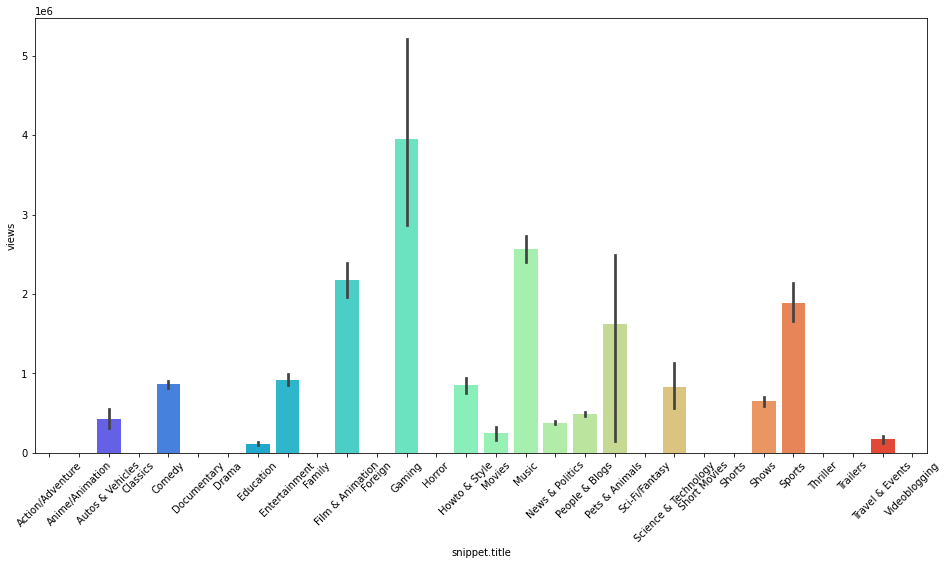

In [49]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(x="snippet.title", y="views", data=data_cat, palette='rainbow')

Se utilizó la cantidad de vistas como el indicador de tendencia. Como se observa en el gráfico, las tres primeras categorías con mayor tendencia son: Gaming, Music, Family

##### 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

##### 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

##### 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

##### 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

#### Por el tiempo transcurrido

##  Visualizar los Datos